In [125]:
import pandas as pd
import re
from textblob import TextBlob as tb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
filenameTrump ='/Users/konishbharathrajjonnalagadda/Desktop/UNH/intro to data science/Sentiment analysis/archive/hashtag_donaldtrump.csv'
filenameJoeBiden ='/Users/konishbharathrajjonnalagadda/Desktop/UNH/intro to data science/Sentiment analysis/archive/hashtag_joebiden.csv'

In [127]:
filenameTrump

'/Users/konishbharathrajjonnalagadda/Desktop/UNH/intro to data science/Sentiment analysis/archive/hashtag_donaldtrump.csv'

In [128]:
dfTrump = pd.read_csv(filenameTrump,lineterminator='\n')
dfBiden = pd.read_csv(filenameJoeBiden,lineterminator='\n')

In [129]:
def cleanUpTweet(text):
    text = re.sub(r'@[A-Z0-9a-z_]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'@[A-Z0-9a-z_]+','',text)
    text = re.sub(r'https?\/\/[A-Za-z0-9\.\/]+','',text)
    return text

In [130]:
dfTrump['tweet']=dfTrump['tweet'].apply(cleanUpTweet )

In [131]:
fewTweetsTrump = dfTrump['tweet'].to_frame()

In [132]:
fewTweetsTrump

,tweet
0,Elecciones2020 | En Florida: JoeBiden dice que...
1,"Usa 2020, Trump contro Facebook e Twitter: cop..."
2,"Trump: As a student I used to hear for years, ..."
3,2 hours since last tweet from Trump! Maybe he ...
4,You get a tie! And you get a tie! Trump ‘s ral...
...,...
970914,Sagten Sie nicht Sie wären kein Sozi!?\n\...
970915,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...
970916,AfD|ler reagieren panisch bis hysterisch auf d...
970917,"First, you would need to compare that to pr..."


In [133]:
def getPolarity(text):
    return tb(text).sentiment.polarity
    

In [134]:
fewTweetsTrump['tweetPolarity'] = fewTweetsTrump['tweet'].apply(getPolarity)

In [135]:
fewTweetsTrump

,tweet,tweetPolarity
0,Elecciones2020 | En Florida: JoeBiden dice que...,0.000000
1,"Usa 2020, Trump contro Facebook e Twitter: cop...",0.000000
2,"Trump: As a student I used to hear for years, ...",0.333333
3,2 hours since last tweet from Trump! Maybe he ...,0.076667
4,You get a tie! And you get a tie! Trump ‘s ral...,0.000000
...,...,...
970914,Sagten Sie nicht Sie wären kein Sozi!?\n\...,0.000000
970915,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,-0.150000
970916,AfD|ler reagieren panisch bis hysterisch auf d...,0.000000
970917,"First, you would need to compare that to pr...",0.130556


In [136]:
def getScore(polarity):
    if polarity<0:
        return 'Negative'
    elif polarity>0:
        return 'Positive'
    else:
        return 'Neutral'

In [137]:
fewTweetsTrump['score']=fewTweetsTrump['tweetPolarity'].apply(getScore)

In [138]:
fewTweetsTrump

,tweet,tweetPolarity,score
0,Elecciones2020 | En Florida: JoeBiden dice que...,0.000000,Neutral
1,"Usa 2020, Trump contro Facebook e Twitter: cop...",0.000000,Neutral
2,"Trump: As a student I used to hear for years, ...",0.333333,Positive
3,2 hours since last tweet from Trump! Maybe he ...,0.076667,Positive
4,You get a tie! And you get a tie! Trump ‘s ral...,0.000000,Neutral
...,...,...,...
970914,Sagten Sie nicht Sie wären kein Sozi!?\n\...,0.000000,Neutral
970915,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,-0.150000,Negative
970916,AfD|ler reagieren panisch bis hysterisch auf d...,0.000000,Neutral
970917,"First, you would need to compare that to pr...",0.130556,Positive


In [139]:
positiveTrump = fewTweetsTrump[fewTweetsTrump['score']=='Positive']
positivePercTrump = (positiveTrump.shape[0]/fewTweetsTrump.shape[0])*100
NegativeTrump = fewTweetsTrump[fewTweetsTrump['score']=='Negative']
NegativePercTrump = (NegativeTrump.shape[0]/fewTweetsTrump.shape[0])*100
NeutralTrump = fewTweetsTrump[fewTweetsTrump['score']=='Neutral']
NeutralPercTrump = (NeutralTrump.shape[0]/fewTweetsTrump.shape[0])*100

In [140]:
positivePercTrump,NegativePercTrump,NeutralPercTrump

(28.58127197016435, 16.61075743702616, 54.8079705928095)

In [141]:
dfBiden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,...,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,...,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,...,15806.0,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,...,5974.0,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846


In [142]:
fewTweetsBiden = dfBiden['tweet'].to_frame()

In [143]:
fewTweetsBiden

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
1,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...
3,@chrislongview Watching and setting dvr. Let’s...
4,#censorship #HunterBiden #Biden #BidenEmails #...
...,...
776881,Stop laying @CNN !\n#Paris and #London dont gi...
776882,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...
776883,L'OTAN va sortir de sa léthargie et redevenir ...
776884,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...


In [144]:
fewTweetsBiden['tweet']=fewTweetsBiden['tweet'].apply(cleanUpTweet)

In [145]:
fewTweetsBiden['polarity']=fewTweetsBiden['tweet'].apply(getPolarity)

In [146]:
fewTweetsBiden['score']=fewTweetsBiden['polarity'].apply(getScore)

In [147]:
PositiveBiden = fewTweetsBiden[fewTweetsBiden['score']=='Positive']
positivePercBiden = (positiveTrump.shape[0]/fewTweetsBiden.shape[0])*100

In [148]:
NegativeBiden = fewTweetsBiden[fewTweetsBiden['score']=='Negative']
NegativePercBiden = (NegativeBiden.shape[0]/fewTweetsBiden.shape[0])*100

In [149]:
NeutralBiden = fewTweetsBiden[fewTweetsBiden['score']=='Neutral']
NeutralPercBiden = (NeutralBiden.shape[0]/fewTweetsBiden.shape[0])*100

In [150]:
positivePercBiden,NegativePercBiden,NeutralPercBiden

(35.71965513601738, 12.627335284713586, 56.70497344526739)

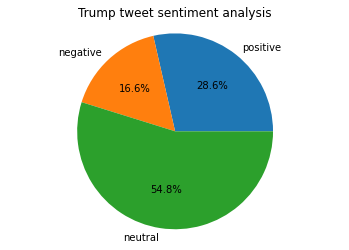

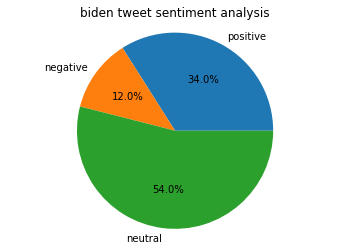

In [152]:
labels = ['positive', 'negative', 'neutral']
sizes = [positivePercTrump,NegativePercTrump,NeutralPercTrump]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('Trump tweet sentiment analysis')


plt.show()

labels = ['positive', 'negative', 'neutral']
sizes = [positivePercBiden,NegativePercBiden,NeutralPercBiden]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('biden tweet sentiment analysis')


plt.show()


In [176]:
text1 = "The camera in this phone is good"
text2 = "but the battery life is disappointing"

In [181]:
fewTweetsTrump

,tweet,tweetPolarity,score
0,Elecciones2020 | En Florida: JoeBiden dice que...,0.000000,Neutral
1,"Usa 2020, Trump contro Facebook e Twitter: cop...",0.000000,Neutral
2,"Trump: As a student I used to hear for years, ...",0.333333,Positive
3,2 hours since last tweet from Trump! Maybe he ...,0.076667,Positive
4,You get a tie! And you get a tie! Trump ‘s ral...,0.000000,Neutral
...,...,...,...
970914,Sagten Sie nicht Sie wären kein Sozi!?\n\...,0.000000,Neutral
970915,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,-0.150000,Negative
970916,AfD|ler reagieren panisch bis hysterisch auf d...,0.000000,Neutral
970917,"First, you would need to compare that to pr...",0.130556,Positive


In [204]:
samplePositivePlarityTrump = fewTweetsTrump[['tweet','tweetPolarity']]

In [205]:
type(samplePositivePlarity)

pandas.core.frame.DataFrame

In [206]:
trumpPolarityList = list(samplePositivePlarityTrump['tweetPolarity'])

In [207]:
trumpAverage_polarity = sum(trumpPolarityList)/len(trumpPolarityList)

In [208]:
trumpAverage_polarity

0.0438231471304223

In [211]:
fewTweetsBiden

,tweet,polarity,score
0,Elecciones2020 | En Florida: JoeBiden dice que...,0.00,Neutral
1,HunterBiden HunterBidenEmails JoeBiden JoeBide...,0.00,Neutral
2,This is how Biden made his ! TrumpIsNotAmer...,0.00,Neutral
3,Watching and setting dvr. Let’s give him bonu...,0.00,Neutral
4,censorship HunterBiden Biden BidenEmails Biden...,0.00,Neutral
...,...,...,...
776881,Stop laying !\nParis and London dont give a f...,-0.50,Negative
776882,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.00,Neutral
776883,L'OTAN va sortir de sa léthargie et redevenir ...,0.00,Neutral
776884,🌎\n\n“congiuntifuoriregione”\n\n‘Sono felice p...,0.25,Positive


In [306]:
samplePositivePlarityBiden = fewTweetsBiden[['tweet','polarity']]

In [307]:
BidenPolarityList = list(samplePositivePlarityBiden['polarity'])

In [308]:
BidenAverage_polarity = sum(BidenPolarityList)/len(BidenPolarityList)

In [309]:
BidenAverage_polarity

0.07158424128698783

In [333]:
trumpBidenPolarity = [['trump',trumpAverage_polarity],['biden',BidenAverage_polarity]]

In [334]:
trumpBidenPolarity

[['trump', 0.0438231471304223], ['biden', 0.07158424128698783]]

In [335]:
trumpBidenPolarity=np.array(trumpBidenPolarity)

In [336]:
trumpBidenPolarity = pd.DataFrame(trumpBidenPolarity,columns=['name','polarity'])

In [337]:
trumpBidenPolarity

,name,polarity
0,trump,0.0438231471304223
1,biden,0.07158424128698783


In [338]:
trumpBidenPolarityList=list(trumpBidenPolarity['polarity'])
listTemp=[]
for item in trumpBidenPolarityList:
    listTemp.append(float(item))
trumpBidenPolarityList=listTemp
trumpBidenPolarityList

[0.0438231471304223, 0.07158424128698783]

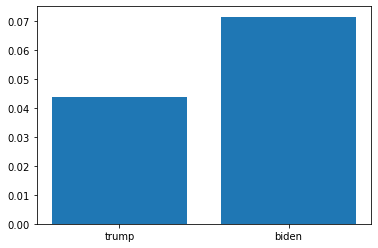

In [347]:

bars = list(trumpBidenPolarity['name'])
y_pos = np.arange(len(bars))


plt.bar(bars, trumpBidenPolarityList)

plt.xticks(y_pos, bars)

plt.show()
